#  SOQCS Example 3: CZ

<p style='text-align: justify;'> We use SOQCS to simulate a CZ circuit as described in ref.[1]. </p>

[1]  E. Knill, R. Laflamme, G. J. Milburn, A scheme for efficient quantum computation with linear optics, **Nature 409 46-52** (2001)



In [1]:
import soqcs                    # Import SOQCS
sim=soqcs.simulator(mem=10000)  # Initialize the simulator. Maximum number of kets of the output 10000

## Building a CZ circuit

<p style='text-align: justify;'> Here we build a circuit as described in [1]. This is done in the same way than in example 1<br> </p>

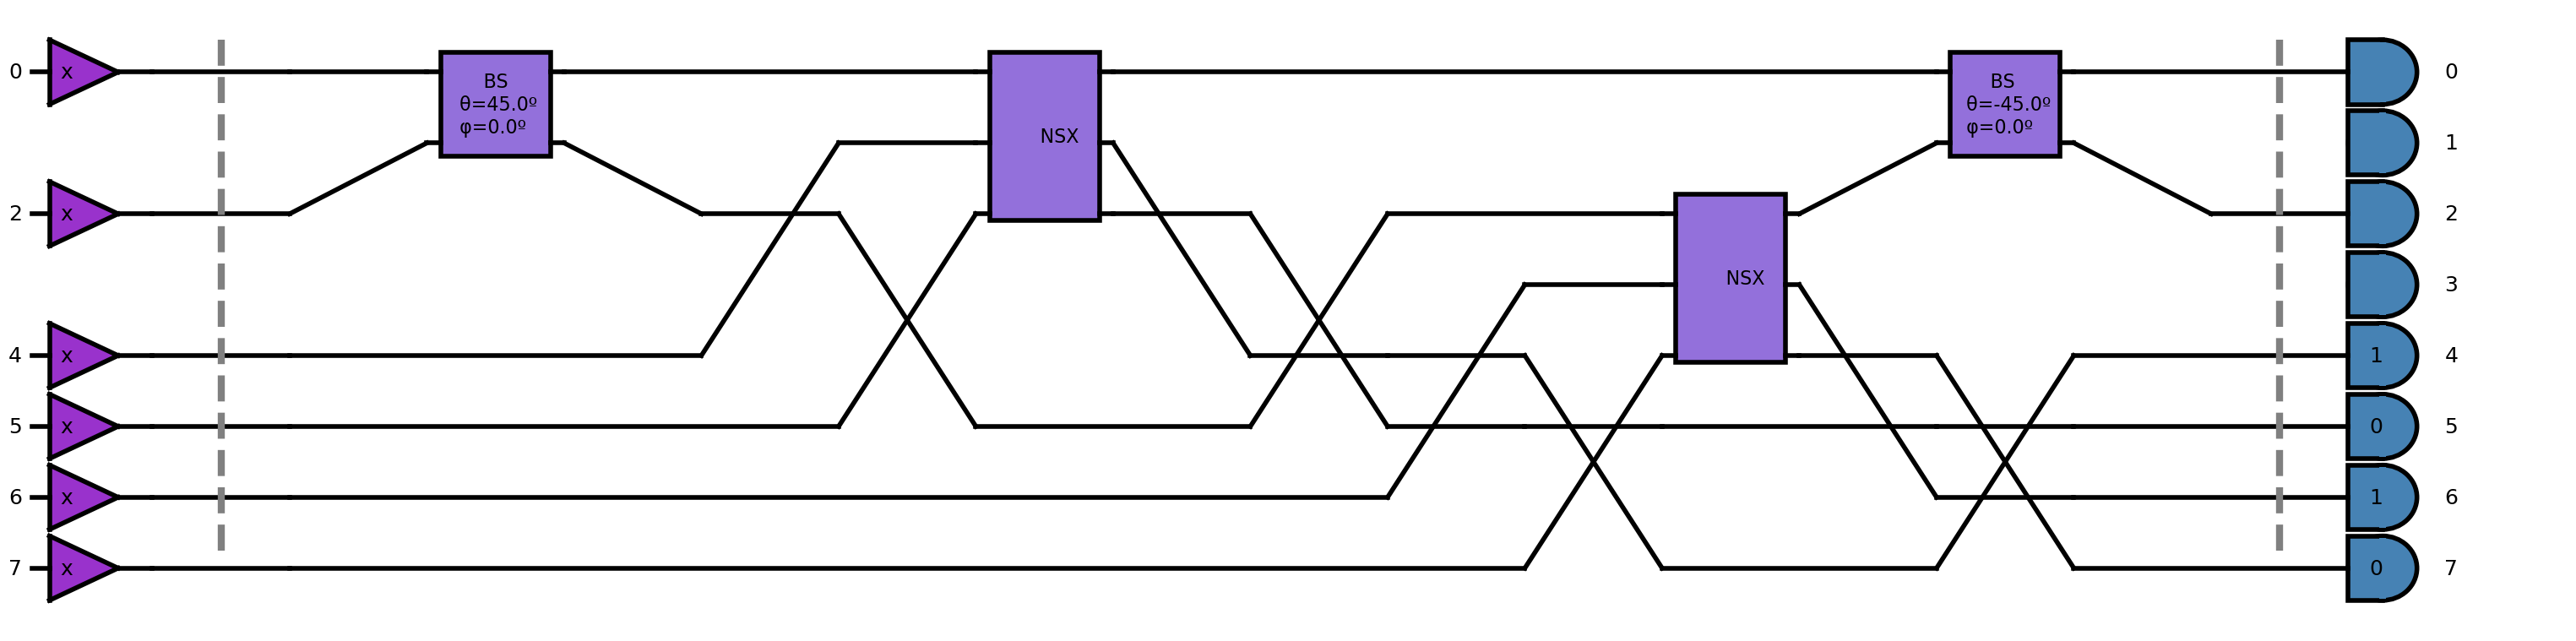

In [2]:
csign = soqcs.qodev(3,8)
csign.open_channel(0)
csign.open_channel(2)
csign.open_channel(4)
csign.open_channel(5)
csign.open_channel(6)
csign.open_channel(7)
csign.separator()
csign.beamsplitter(0,2,45.0,0.0)
csign.NSX(0, 4, 5)
csign.NSX(2, 6, 7)
csign.beamsplitter(0,2,-45.0,0.0)
csign.separator()
csign.detector(0)
csign.detector(1)
csign.detector(2)
csign.detector(3)
csign.detector(4,1)
csign.detector(5,0)
csign.detector(6,1)
csign.detector(7,0)
csign.show(depth=20)

## Qubit declaration

<p style='text-align: justify;'> We define the qubits also in the same way as in the previous example. Of course now the channels assigned to each qubit are the appropriate ones for this circuit. Remember that qubits are defined by column of the matrix. This is done to match the functionality of the C++ counterpart of this library. </p>

In [3]:
qmap=[[0, 2],
      [1, 3]]

## Example with | 1, 1 > input

<p style='text-align: justify;'> Below we create a circuit and we define the input adding the photons to the circuit. The initialization can be done directly from the qubit values. In this case the list qlist=[1,1]. Channels that do not belong to a qubit definition are the ancilla channels. In this case we have four ancilla channels. These channels are initialized to ncilla=[1,0,1,0]. This is, channels one and seven are initialized to zero and channels zero and six to one.</p>

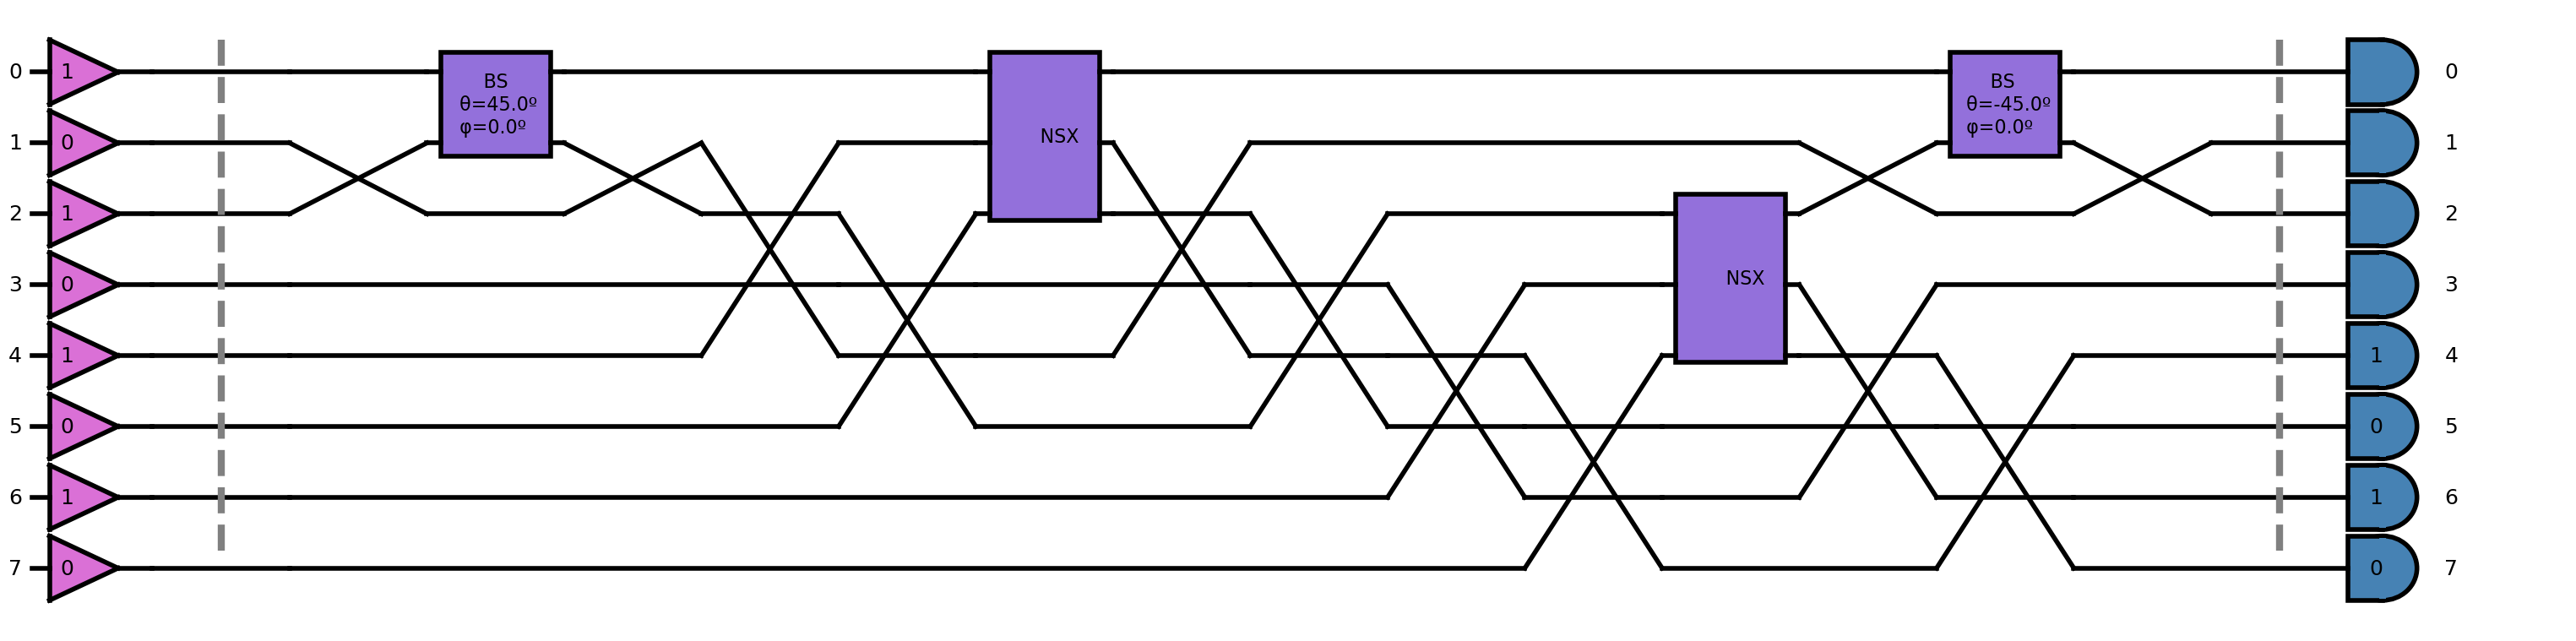

In [4]:
csign10=soqcs.qodev(3,8);                               # Create a circuit
csign10.qubits(qlist=[1,1],ancilla=[1,0,1,0],qmap=qmap) # Define the input
csign10 << csign                                        # Append the gates
csign10.show(depth=20)                                  # Show the resulting circuit.

Now the simulation is performed. Note that we are interested in the output state instead of the output probability distribution because the CZ gate acts on the phase of the state. Therefore we need to use the run_st command instead of run. We can obtain the initial state and the circuit definition from the qodev class with the method of qodev ".input()" and ".circuit()" respectively. <br>

In [5]:
raw_output=sim.run_st(csign10.input(),csign10.circuit())

When the command run_st is used post-selection is not applied automatically as it happens when the command run is used instead. Therefore we have to apply post-selection, encode and print the result.

In [6]:
output=csign10.apply_condition(raw_output)     # Apply post-selection. Needed if run_st is used instead of run.
encoded=output.encode(qmap,csign10.circuit())  # Endode the output.
encoded.prnt_state(column=1)                   # Print state.

 | 1, 1 >: -0.25000000 + 0.00000000 j



## Example with | 0, 0 > + | 0, 1 > + | 1, 0 > + | 1, 1 > input

Here we present the output state using an input made of a linear superposition of kets. The input qubit state is created and defined manually. The result is decoded into a photonic state and supplied to the simulation instead of the previously defined input state. The rest of the steps are identical.

In [7]:
# Create qubit input state
qubit= soqcs.state(2)
qubit.add_ket(0.5,[0,0])
qubit.add_ket(0.5,[0,1])
qubit.add_ket(0.5,[1,0])
qubit.add_ket(0.5,[1,1])

# Run simulation
raw_output=sim.run_st(qubit.decode(qmap,[1,0,1,0],csign10.circuit()),csign10.circuit())

# Perform post-selection 
output=csign10.apply_condition(raw_output)
encoded=output.encode(qmap,csign10.circuit())
encoded.normalize()

# Print the result
encoded.prnt_state(column=1)

 | 0, 0 >:  0.50000000 + 0.00000000 j
 | 0, 1 >:  0.50000000 + 0.00000000 j
 | 1, 0 >:  0.50000000 + 0.00000000 j
 | 1, 1 >: -0.50000000 + 0.00000000 j



**THIS CODE IS PART OF SOQCS** <br>

**Copyright:** <br>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>